## Sniffer
---
"Sniff out good and bad images in your dataset"

Row(height=300, sizing_mode='fixed', width=655)
    [0] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='danger', margin=(120, 20), name='NO', width=50)
    [1] Column(align='center', margin=(0, 5), sizing_mode='fixed')
        [0] StaticText(margin=(0, 10))
        [1] JPG(str, height=250, sizing_mode='fixed', width=250)
    [2] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='success', margin=(120, 20), name='YES', width=50)
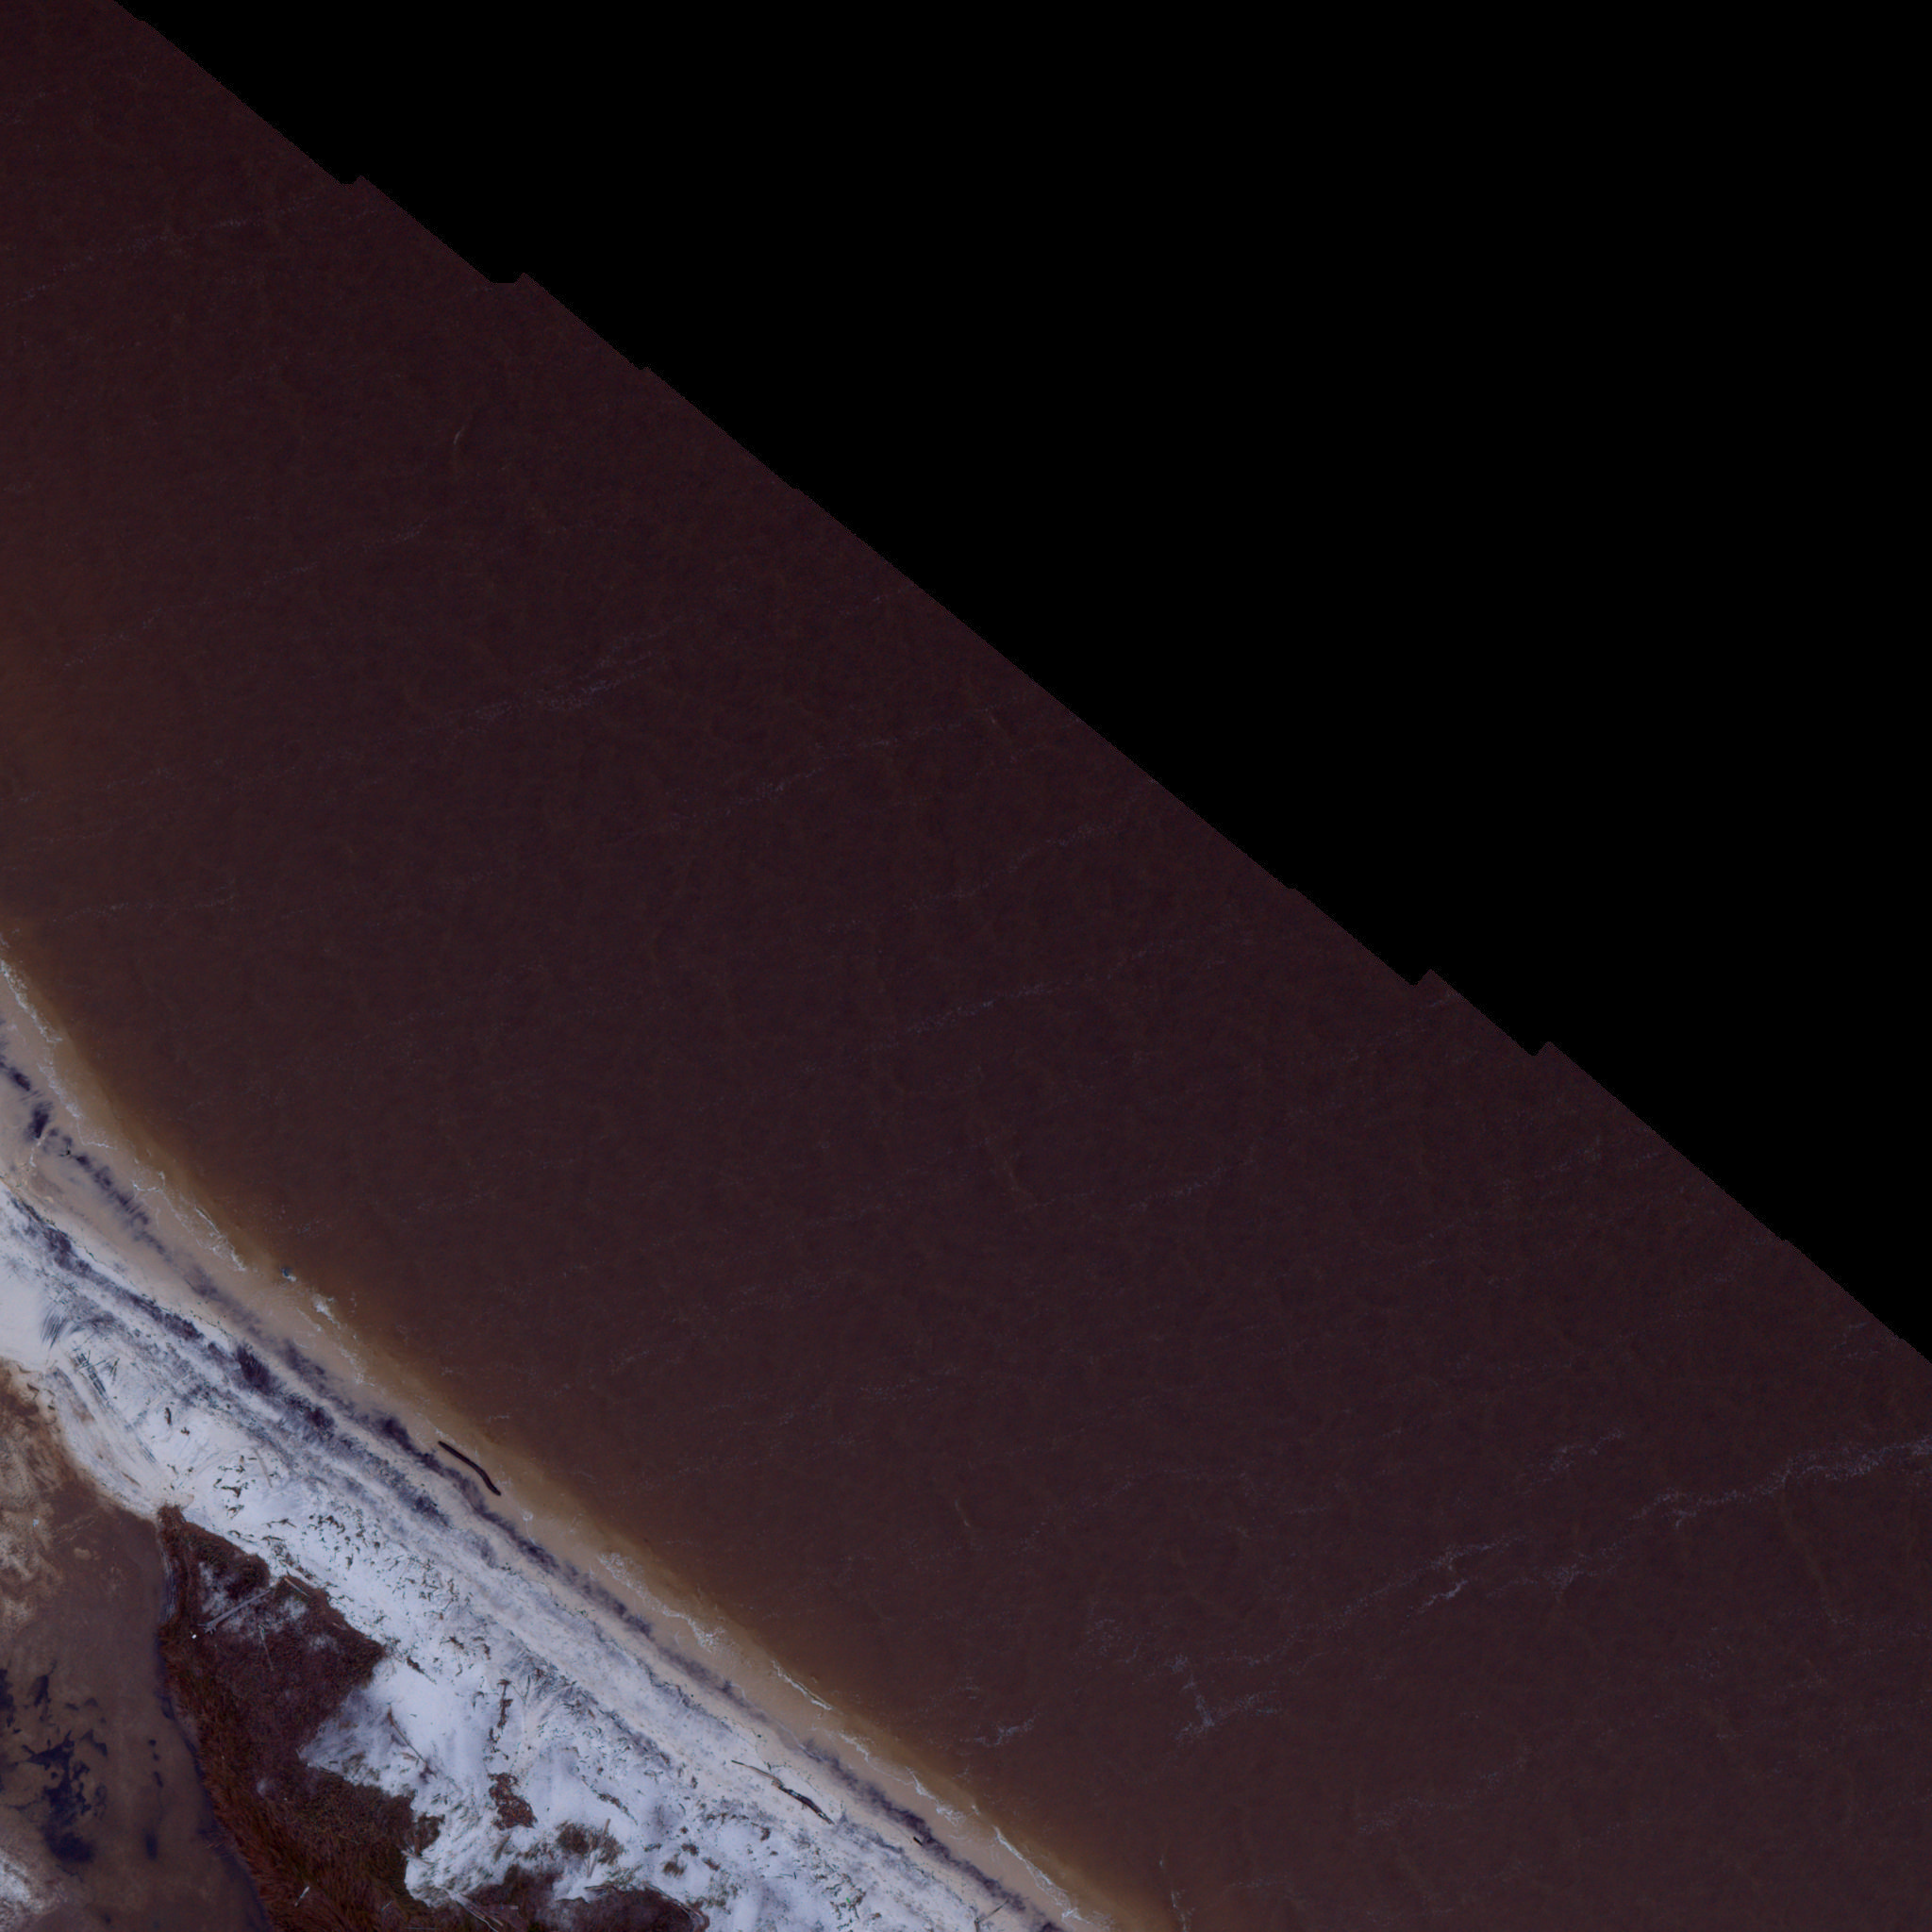

In [1]:
import shutil
import panel as pn
import param
import asyncio
import os
import asyncio
import glob
import holoviews as hv
pn.extension()

def copy_image(photo_loc:str, ext:str):
        """COPY photo_loc to the sorted_images directory with the ext appended to the filename"""
        
        # Check if the sorted dir exists if it doesn't create it
        sorted_images_path=os.getcwd()+os.sep+"sorted_images"
        if not os.path.isdir(sorted_images_path):
            os.mkdir(sorted_images_path)

        # Change the filename of the photo_loc
        new_filename=change_filename(os.path.basename(photo_loc),ext,sorted_images_path)

        # Move the image from images into sorted_images
        shutil.copyfile(photo_loc, new_filename)
    
def change_filename(old_filename:str, ext:str, photos_dir:str):
        """Appends ext to the end of the filename. Returns the location of the file in the location with photos_dir"""
        new_filename=os.path.splitext(old_filename)
        new_filename=new_filename[0]+"_"+str(ext)+new_filename[1]
        new_photo_loc=photos_dir+os.sep+new_filename
        return new_photo_loc

    
async def save_sorted_image(index,ext):
    photos_dir_location=os.getcwd()+os.sep+"images"
    list_ = glob.glob(photos_dir_location+os.sep+"*jpg")
    photos_list=map(lambda x:os.path.basename(x),list_ )
    photos_list=list(photos_list)
    photo_loc=photos_dir_location+os.sep+photos_list[index]
    copy_image(photo_loc,ext)
    await asyncio.sleep(0.5)
    
    
def quality_control(photos_dir_location,photos_list):
    """Helper function to check if the photos_dir_location exists and that it contains jpgs. Returns false if either check fails"""
    if not os.path.isdir(photos_dir_location):
            os.mkdir(photos_dir_location)
            return False
    if len(photos_list)==0:
            return False
#         If neither of these return false it means quality control passed
    return True
             
# Class to hold parameters
class BaseClass(param.Parameterized):
    num_int                 = param.Integer(0) 

base = BaseClass()
base.num_int=0

# Variables for images
photos_dir_location=os.getcwd()+os.sep + "images"
list_ = glob.glob(photos_dir_location+os.sep+"*jpg")
photos_list=map(lambda x:os.path.basename(x),list_ )
photos_list=list(photos_list)
last_index_photos_list=len(photos_list)
last_index_photos_list-=1
if quality_control(photos_dir_location,photos_list)==False:
    raise FileNotFoundError (f"{photos_dir_location} contains no jpgs")
    
inital_photo=photos_dir_location+os.sep+photos_list[0]

# Widgets
jpg_panel=pn.pane.JPG(inital_photo, width=250, height=250,sizing_mode='fixed')
yes_button = pn.widgets.Button(name='YES',width=50,button_type='success',margin=(120,20))
no_button = pn.widgets.Button(name='NO',width=50,button_type='danger', margin=(120,20))
text = pn.widgets.StaticText(margin=(0,10))


async def run_async(event):
    if (event.obj.name == "YES"):
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Saving image #{base.num_int} with yes'
            await save_sorted_image(base.num_int,"good")
            base.num_int+=1
# Check if all images have been processed, if so display the first image
            if base.num_int > last_index_photos_list:
                 text.value = "All images have been processed."
                 last_photo=os.getcwd()+os.sep + "assets"+os.sep+"done.jpg"
                 jpg_panel.object=last_photo
# Still more jpgs to check
            else:
                new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
                # Update the jpg_panel with the new image
                jpg_panel.object=new_photo
                text.value = f'Finished saving image #{base.num_int -1} with yes'
                yes_button.disabled=False
                no_button.disabled=False
# Quality control has failed disable all buttons and display error message
        elif not quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value=f"ERROR: There are no images in\n{photos_dir_location}"
    else:
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Saving image #{base.num_int} with no'
            await save_sorted_image(base.num_int,"bad")
            base.num_int+=1
# Check if all images have been processed, if so display the first image
            if base.num_int > last_index_photos_list:
                text.value = "All images have been processed."
                last_photo=os.getcwd()+os.sep + "assets"+os.sep+"done.jpg"
                jpg_panel.object=last_photo
# Still more jpgs to check
            else:
                new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
                jpg_panel.object=new_photo
                text.value = f'Finished saving image #{base.num_int -1} with no'
                yes_button.disabled=False
                no_button.disabled=False
# Quality control has failed disable all buttons and display error message
        elif not quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value=f"ERROR: There are no images in\n{photos_dir_location}"

yes_button.on_click(run_async)
no_button.on_click(run_async) 

component = pn.Row(
    pn.Column(no_button,width=100,height=295,margin=(0,10)),
    pn.Column(text,jpg_panel,margin=(0,5),align='center',sizing_mode='fixed'),
    pn.Column(yes_button,width=100,height=295,margin=(0,10)),
    width=655,
    height=300,
    )
# You can also serve the component individually
# component.servable() 
component

Traceback (most recent call last):
 File "C:\Users\Sharon\anaconda3\envs\Sniffer\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Sharon\anaconda3\envs\Sniffer\lib\site-packages\panel\viewable.py", line 272, in _on_msg
 patch.apply_to_document(doc, comm.id)
AttributeError: 'NoneType' object has no attribute 'id'

MaterialTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] MaterialTemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [1906692849056] Row(height=300, sizing_mode='fixed', width=655)
        [0] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
            [0] Button(button_type='danger', margin=(120, 20), name='NO', width=50)
        [1] Column(align='center', margin=(0, 5), sizing_mode='fixed')
            [0] StaticText(margin=(0, 10))
            [1] JPG(str, height=250, sizing_mode='fixed', width=250)
        [2] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
            [0] Button(button_type='success', margin=(120, 20), name='YES', width=50)
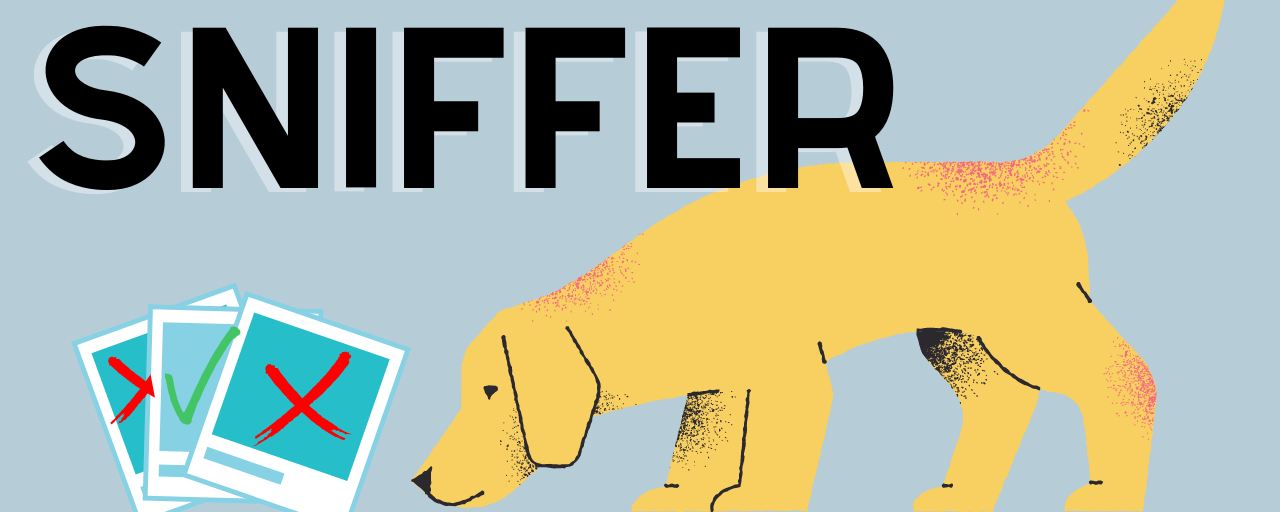
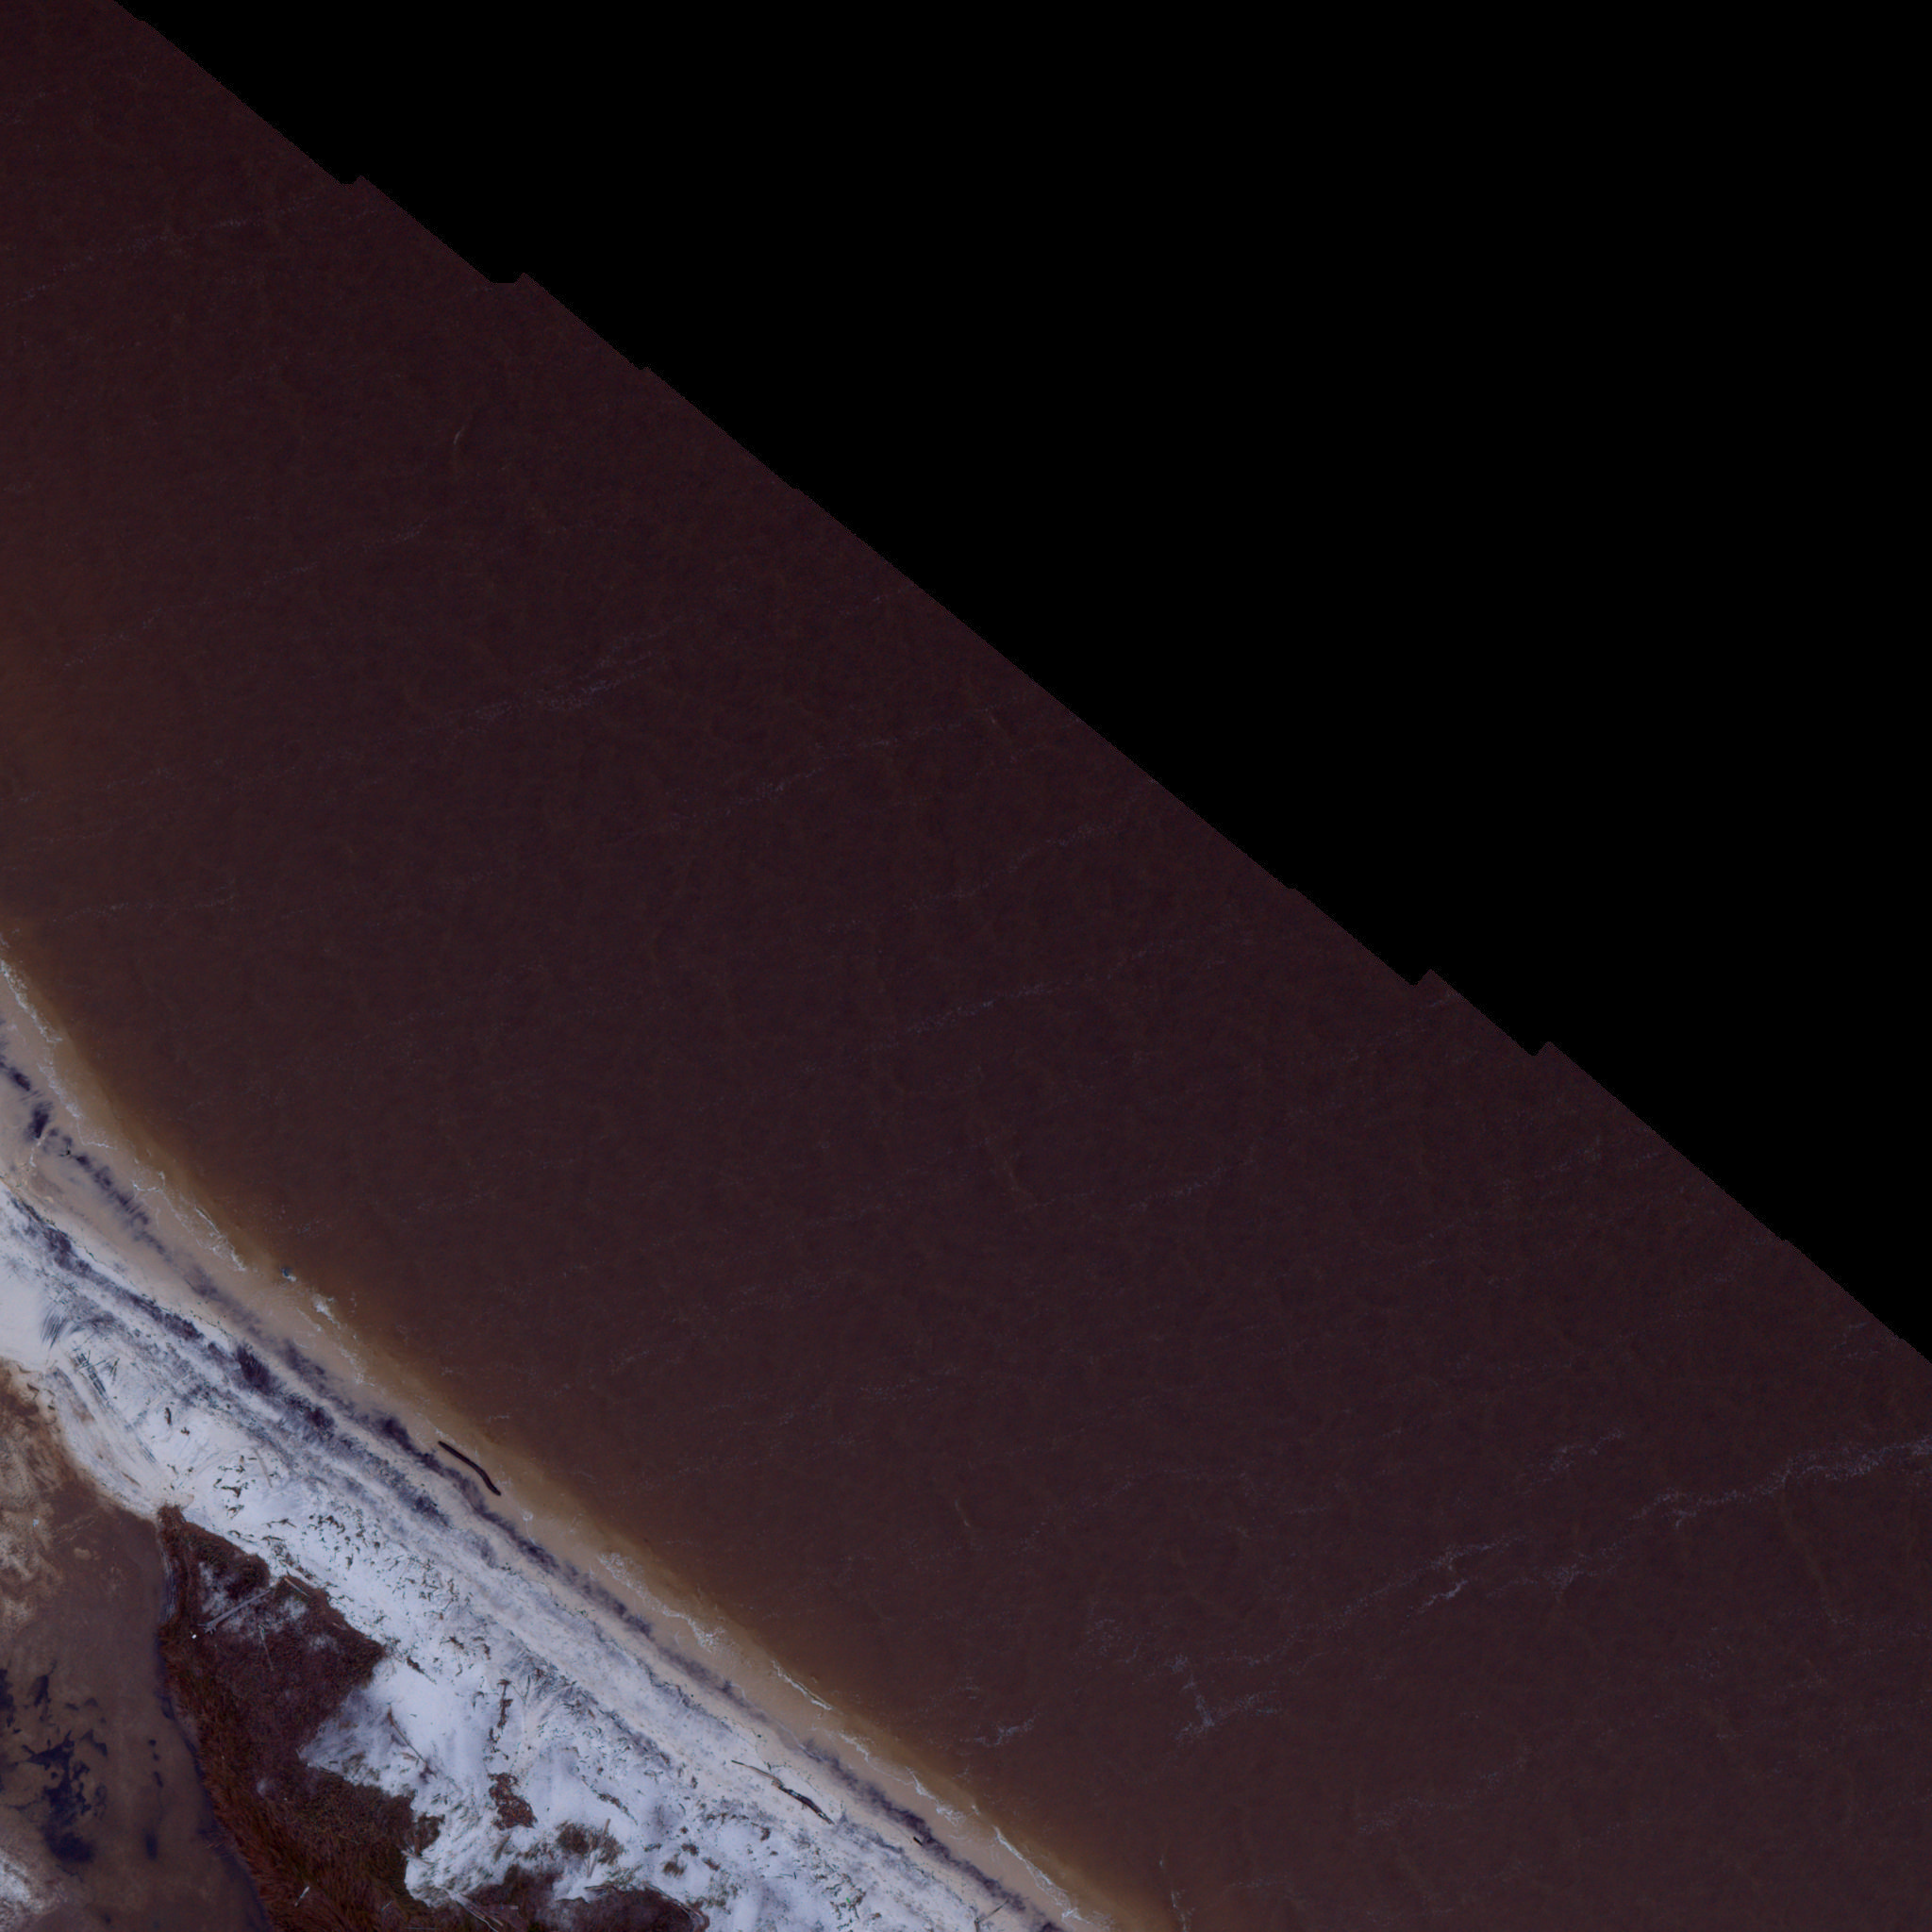

In [9]:
# Creates a template that can be served with the command
# panel serve Sniffer.ipynb from the command line
template = pn.template.MaterialTemplate(
    title='',
    logo='assets/sniffer_BIG.png',
    header_background='#B6CCD7',
    main=[component],
)
template.servable();
template